In [3]:
# importing the libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [4]:
# read data from excel
bike_df = pd.read_csv("SeoulBikeData.csv",encoding='cp1252')

In [5]:
print("Info Details")
bike_df.info()

Info Details
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non

In [6]:
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
#checking missing values
bike_df.isna().sum()
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [8]:
#checking duplicate values
print('Duplicate values : ', len(bike_df[bike_df.duplicated()]))

Duplicate values :  0


In [9]:
# Dependent variable is Rented Bike Count. 
# We will change this numerical output to a binary classification 
# Adding a new variable with threshold set 
threshold = bike_df['Rented Bike Count'].quantile(0.75)
threshold

1065.25

In [10]:
# We set the threshold to 1065.25, which is the 75th percentile for Rented Bike Count.
# Every field with a bike count above 1065.25 will be labeled 1, 
# and rest will be labeled 0.
# threshold = 1065.25
bike_df["Rented_Bike_Count_Value"] = (bike_df['Rented Bike Count'] > threshold).astype(float)
bike_df.head(5000)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented_Bike_Count_Value
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,0.0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,0.0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes,0.0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,0.0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,27/06/2018,152,3,19.4,97,2.9,282,18.9,0.00,0.0,0.0,Summer,No Holiday,Yes,0.0
4996,27/06/2018,110,4,19.2,97,1.0,217,18.7,0.00,0.5,0.0,Summer,No Holiday,Yes,0.0
4997,27/06/2018,162,5,19.1,97,1.2,402,18.6,0.00,0.0,0.0,Summer,No Holiday,Yes,0.0
4998,27/06/2018,417,6,19.2,97,1.5,157,18.7,0.00,0.0,0.0,Summer,No Holiday,Yes,0.0


# DATA PRE PROCESSING

In [11]:
# Add few variables (split the date to month, year,weekday and day)
bike_df['Date']=pd.to_datetime(bike_df['Date'])
from datetime import datetime
import datetime as dt

bike_df['Year']=bike_df['Date'].dt.year
bike_df['Month']=bike_df['Date'].dt.month
bike_df['Day']=bike_df['Date'].dt.day
bike_df['DayName']=bike_df['Date'].dt.day_name()
bike_df['Weekday'] = bike_df['DayName'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_df=bike_df.drop(columns=['Date','DayName','Year'],axis=1)

In [12]:
#Holiday, Functioning Day and Seasons need to have dummy variables  (object DType)
bike_df = pd.get_dummies(bike_df, columns = ['Seasons',	'Holiday',	'Functioning Day'])

In [13]:
bike_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,Day,Weekday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,12,0,0,0,0,1,0,1,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,12,0,0,0,0,1,0,1,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,12,0,0,0,0,1,0,1,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,12,0,0,0,0,1,0,1,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,12,0,0,0,0,1,0,1,0,1


# DECLARE FEATURE VECTOR AND TARGET VARIABLE

In [14]:
# Split the features in X and Y
X = bike_df.drop(columns=['Rented_Bike_Count_Value','Rented Bike Count'], axis=1)
y = bike_df['Rented_Bike_Count_Value']

# SPLIT DATA TO TRAINING AND TEST SET

In [15]:
#Create test and train data
from sklearn.model_selection import train_test_split
#split the data by percentage
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

#checking the shape of X_train and X_test
print(X_train.shape)
print(X_test.shape)

(6132, 20)
(2628, 20)


# FEATURE SCALING

In [16]:
cols = X_train.columns

In [17]:
print("------Data Standardization------")
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

------Data Standardization------


In [18]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [19]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [20]:
X_train.describe()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Day,Weekday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
count,6.132000e+03,6.132000e+03,6.132000e+03,6.132000e+03,6.132000e+03,6.132000e+03,6.132000e+03,6.132000e+03,6.132000e+03,6.132000e+03,6.132000e+03,6.132000e+03,6.132000e+03,6.132000e+03,6.132000e+03,6.132000e+03,6.132000e+03,6.132000e+03,6.132000e+03,6.132000e+03
mean,-7.234917e-17,-6.702618e-17,-1.211975e-16,6.257226e-17,-3.206104e-16,-5.117943e-17,-3.165186e-16,-2.736450e-16,-2.544623e-16,-2.109641e-16,-8.368315e-17,3.342257e-17,-5.454070e-16,-3.406712e-16,-3.779321e-16,4.058506e-16,-7.539269e-16,7.539269e-16,2.003543e-16,-6.535415e-16
std,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00
min,-1.659334e+00,-2.533723e+00,-2.852222e+00,-1.653769e+00,-2.314733e+00,-2.643712e+00,-6.563217e-01,-1.258994e-01,-1.733208e-01,-1.607790e+00,-1.665353e+00,-6.354889e-01,-5.788567e-01,-5.811165e-01,-5.786057e-01,-5.708221e-01,-2.252103e-01,-4.440295e+00,-1.826665e-01,-5.474459e+00
25%,-9.364391e-01,-8.061881e-01,-7.873192e-01,-7.905332e-01,-8.106573e-01,-6.793708e-01,-6.563217e-01,-1.258994e-01,-1.733208e-01,-7.372153e-01,-8.695962e-01,-6.354889e-01,-5.788567e-01,-5.811165e-01,-5.786057e-01,-5.708221e-01,-2.252103e-01,2.252103e-01,-1.826665e-01,1.826665e-01
50%,7.561397e-02,7.009769e-02,-4.985388e-02,-2.150426e-01,4.410263e-01,7.732100e-02,-6.448790e-01,-1.258994e-01,-1.733208e-01,1.333594e-01,3.983973e-02,-6.354889e-01,-5.788567e-01,-5.811165e-01,-5.786057e-01,-5.708221e-01,-2.252103e-01,2.252103e-01,-1.826665e-01,1.826665e-01
75%,7.985090e-01,8.128542e-01,7.859402e-01,5.522783e-01,9.195024e-01,8.187261e-01,4.192940e-01,-1.258994e-01,-1.733208e-01,1.003934e+00,8.355961e-01,1.573592e+00,1.727543e+00,1.720825e+00,1.728293e+00,-5.708221e-01,-2.252103e-01,2.252103e-01,-1.826665e-01,1.826665e-01
max,1.665983e+00,2.206566e+00,1.965885e+00,5.443949e+00,9.195024e-01,1.728285e+00,3.371516e+00,3.057577e+01,2.028756e+01,1.584317e+00,1.745032e+00,1.573592e+00,1.727543e+00,1.720825e+00,1.728293e+00,1.751859e+00,4.440295e+00,2.252103e-01,5.474459e+00,1.826665e-01


# RUN SVM WITH DEFAULT PARAMETERS

1. C = 1.0, kernel = rbf, gamma = auto

In [21]:
# import SVC classifier
from sklearn.svm import SVC
# import metrics to check accuracy
from sklearn.metrics import accuracy_score

# instantiate classifier with default hyperparameters
svclassifier=SVC(random_state = 0) 

# fit classifier to training set
svclassifier.fit(X_train,y_train)

# Making predictions on the test set
y_pred=svclassifier.predict(X_test)
accuracyscore_C1_train = svclassifier.score(X_train, y_train)
accuracyscore_C1_test = svclassifier.score(X_test, y_test)
# Accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9075


In [24]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1904   88]
 [ 155  481]]
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      1992
         1.0       0.85      0.76      0.80       636

    accuracy                           0.91      2628
   macro avg       0.89      0.86      0.87      2628
weighted avg       0.91      0.91      0.91      2628



2. C = 100.0

In [21]:
# instantiate classifier with default hyperparameters
svclassifier=SVC(kernel = 'rbf',C = 100.0) 

# fit classifier to training set
svclassifier.fit(X_train,y_train)

# Making predictions on the test set
y_pred=svclassifier.predict(X_test)
accuracyscore_C100_train = svclassifier.score(X_train, y_train)
accuracyscore_C100_test = svclassifier.score(X_test, y_test)

# Accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9243


3. C = 1000.0

In [22]:
# instantiate classifier with default hyperparameters
svclassifier=SVC(C = 1000.0) 

# fit classifier to training set
svclassifier.fit(X_train,y_train)

# Making predictions on the test set
y_pred=svclassifier.predict(X_test)
accuracyscore_C1000_train = svclassifier.score(X_train, y_train)
accuracyscore_C1000_test = svclassifier.score(X_test, y_test)
# Accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9189


We can see that accuracy score is highest for C = 100. Higher the C value, it indicates that the outliers are less

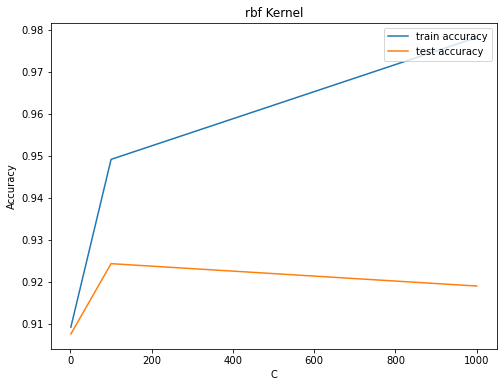

In [24]:
# Plotting Train and Test Accuracy for C parameter 
C = np.array([1, 100,1000])
train_accuracy = [accuracyscore_C1_train,accuracyscore_C100_train,accuracyscore_C1000_train]
test_accuracy = [accuracyscore_C1_test,accuracyscore_C100_test,accuracyscore_C1000_test]
plt.figure(figsize=(8, 6))
plt.plot(C, train_accuracy)
plt.plot(C, test_accuracy)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('rbf Kernel')
plt.legend(['train accuracy','test accuracy'], loc='upper right')
plt.show()

# SVM LINEAR KERNEL

1. Linear Kernel and C = 1.0

In [37]:
linear_svclassifier=SVC(kernel='linear', C=1.0) 
linear_svclassifier.fit(X_train,y_train)
y_pred_test=linear_svclassifier.predict(X_test)
accuracyscore_C1_train = linear_svclassifier.score(X_train, y_train)
accuracyscore_C1_test = linear_svclassifier.score(X_test, y_test)
# Accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.8668


2. Linear Kernel and C = 100.0

In [38]:
linear_svclassifier=SVC(kernel='linear', C=100.0) 
linear_svclassifier.fit(X_train,y_train)
y_pred_test=linear_svclassifier.predict(X_test)
accuracyscore_C100_train = linear_svclassifier.score(X_train, y_train)
accuracyscore_C100_test = linear_svclassifier.score(X_test, y_test)
# Accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.8657


3. Linear Kernel and C = 1000.0

In [39]:
linear_svclassifier=SVC(kernel='linear', C=1000.0) 
linear_svclassifier.fit(X_train,y_train)
y_pred_test=linear_svclassifier.predict(X_test)
accuracyscore_C1000_train = linear_svclassifier.score(X_train, y_train)
accuracyscore_C1000_test = linear_svclassifier.score(X_test, y_test)

# Accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.8668


C = 1.0 and C = 1000.0 gives higher accuracy that C = 100.0

In [ ]:
y_pred_train = linear_svclassifier.predict(X_train)
y_pred_train

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

In [72]:
print('Training set score: {:.4f}'.format(linear_svclassifier.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(linear_svclassifier.score(X_test, y_test)))

Training set score: 0.8599
Test set score: 0.8668


The train and test scores show that there is no underfitting or overfitting as the scores are almost same.

In [28]:
# We will check the Null Accuracy as this is the accuracy that predicts the most frequent class
y_test.value_counts()

0.0    1992
1.0     636
Name: Rented_Bike_Count_Value, dtype: int64

In [29]:
null_accuracy = (1992/(1992+636))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7580


SVM Accuracy is better than Null Accuracy which shows that SVM classifier is better at classfying the labels

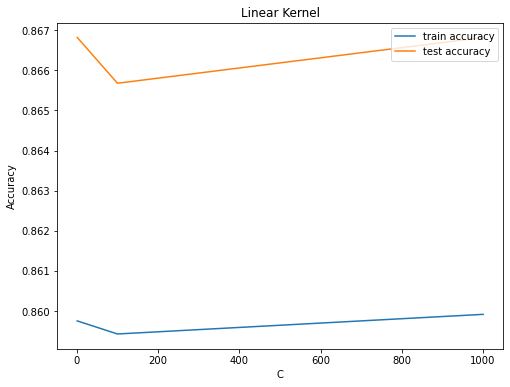

In [40]:
# Plotting Train and Test Accuracy for C parameter 
C = np.array([1, 100,1000])
train_accuracy = [accuracyscore_C1_train,accuracyscore_C100_train,accuracyscore_C1000_train]
test_accuracy = [accuracyscore_C1_test,accuracyscore_C100_test,accuracyscore_C1000_test]
plt.figure(figsize=(8, 6))
plt.plot(C, train_accuracy)
plt.plot(C, test_accuracy)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Linear Kernel')
plt.legend(['train accuracy','test accuracy'], loc='upper right')
plt.show()

# SVM Polynomial Kernel 

1. Polynomial Kernel and C = 1.0

In [42]:
poly_svclassifier=SVC(kernel='poly', C=1.0) 
poly_svclassifier.fit(X_train,y_train)
y_pred_poly=poly_svclassifier.predict(X_test)
accuracyscore_C1_train = poly_svclassifier.score(X_train, y_train)
accuracyscore_C1_test = poly_svclassifier.score(X_test, y_test)

print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_pred_poly, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.7789


2. Polynomial Kernel and C = 100.0

In [43]:
poly_svclassifier=SVC(kernel='poly', C=100.0) 
poly_svclassifier.fit(X_train,y_train)
y_pred_poly=poly_svclassifier.predict(X_test)
accuracyscore_C100_train = poly_svclassifier.score(X_train, y_train)
accuracyscore_C100_test = poly_svclassifier.score(X_test, y_test)
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_poly)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9212


3. Polynomial Kernel and C = 1000.0

In [44]:
poly_svclassifier=SVC(kernel='poly', C=1000.0) 
poly_svclassifier.fit(X_train,y_train)
y_pred_poly=poly_svclassifier.predict(X_test)
accuracyscore_C1000_train = poly_svclassifier.score(X_train, y_train)
accuracyscore_C1000_test = poly_svclassifier.score(X_test, y_test)
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_poly)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9186


POLYNOMIAL model gives better result than LINEAR kernel

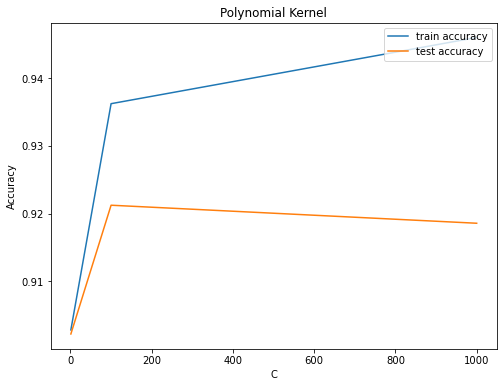

In [45]:
C = np.array([1, 100,1000])
train_accuracy = [accuracyscore_C1_train,accuracyscore_C100_train,accuracyscore_C1000_train]
test_accuracy = [accuracyscore_C1_test,accuracyscore_C100_test,accuracyscore_C1000_test]
plt.figure(figsize=(8, 6))
plt.plot(C, train_accuracy)
plt.plot(C, test_accuracy)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Polynomial Kernel')
plt.legend(['train accuracy','test accuracy'], loc='upper right')
plt.show()

# SVM SIGMOID KERNEL

1. Sigmoid Kernel and C = 1.0

In [46]:
sigmoid_svclassifier=SVC(kernel='sigmoid', C=1.0) 
sigmoid_svclassifier.fit(X_train,y_train)
y_pred=sigmoid_svclassifier.predict(X_test)
accuracyscore_C1_train = sigmoid_svclassifier.score(X_train, y_train)
accuracyscore_C1_test = sigmoid_svclassifier.score(X_test, y_test)
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.7671


2. Sigmoid Kernel and C = 100.0

In [47]:
sigmoid_svclassifier=SVC(kernel='sigmoid', C=100.0) 
sigmoid_svclassifier.fit(X_train,y_train)
y_pred=sigmoid_svclassifier.predict(X_test)
accuracyscore_C100_train = sigmoid_svclassifier.score(X_train, y_train)
accuracyscore_C100_test = sigmoid_svclassifier.score(X_test, y_test)
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.7508


3. Sigmoid Kernel and C = 1000.0

In [48]:
sigmoid_svclassifier=SVC(kernel='sigmoid', C=1000.0) 
sigmoid_svclassifier.fit(X_train,y_train)
y_pred=sigmoid_svclassifier.predict(X_test)
accuracyscore_C1000_train = sigmoid_svclassifier.score(X_train, y_train)
accuracyscore_C1000_test = sigmoid_svclassifier.score(X_test, y_test)
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.7511


SIGMOID kernel performs the poorest among the kernels

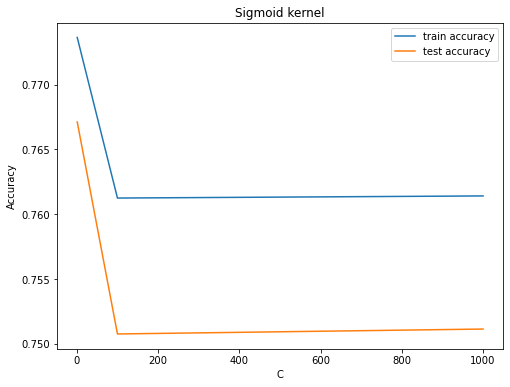

In [49]:
C = np.array([1, 100,1000])
train_accuracy = [accuracyscore_C1_train,accuracyscore_C100_train,accuracyscore_C1000_train]
test_accuracy = [accuracyscore_C1_test,accuracyscore_C100_test,accuracyscore_C1000_test]
plt.figure(figsize=(8, 6))
plt.plot(C, train_accuracy)
plt.plot(C, test_accuracy)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Sigmoid kernel')
plt.legend(['train accuracy','test accuracy'], loc='upper right')
plt.show()

In [36]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, y_pred_test)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8190


GRAPHICAL PLOTS

In [19]:
# Plot learning curves
# plt.figure(figsize=(10,6))
# plt.title("Normal kernel with C=0.1", fontsize=18)
# plt.scatter(X_train, c=y_train, s=50, cmap='cool')
# plot_svc_decision_function(svclassifier)
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVC

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

1. rbf Score Vs Training examples

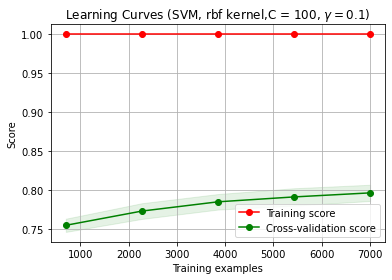

In [21]:
title = "Learning Curves (SVM, rbf kernel,C = 100, $\gamma=0.1$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(C = 100.0, gamma=0.1)
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)

plt.show()

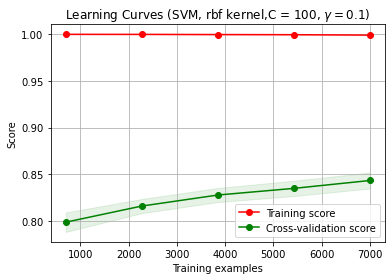

In [22]:
title = "Learning Curves (SVM, rbf kernel,C = 100, $\gamma=0.1$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(C = 100.0, gamma=0.01)
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)

plt.show()

2. poly Score Vs Training Examples

In [ ]:
title = "Learning Curves (SVM, poly kernel,C = 100, $\gamma=0.01$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = SVC(kernel = 'poly',C = 100.0, gamma=0.1)
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)
plt.show()

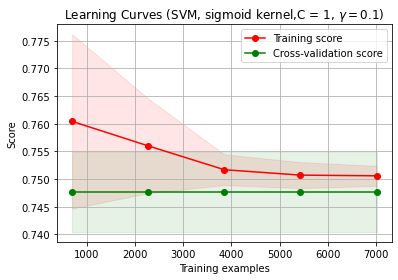

In [20]:
#Sigmoid Kernel
title = "Learning Curves (SVM, sigmoid kernel,C = 1, $\gamma=0.1$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(kernel = 'sigmoid',C = 1.0, gamma=0.1)
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4) 

plt.show()

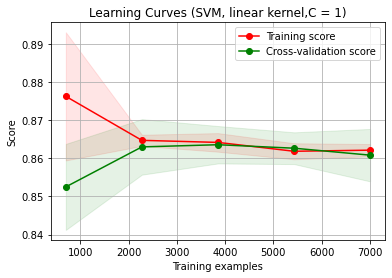

In [20]:
#Linear Kernel
title = "Learning Curves (SVM, linear kernel,C = 1)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = SVC(kernel = 'linear',C = 1.0)
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)
plt.show()


# CROSS VALIDATION - SVM

In [77]:
def cross_validation (classifier):
    from sklearn.model_selection import KFold
    from sklearn.model_selection import cross_val_score
    num_folds = 20
    kfold_validation = KFold(n_splits=num_folds)
    results = cross_val_score(classifier, X, y, cv = kfold_validation)
    accuracy=np.mean(abs(results))
    print('Average accuracy: ',accuracy)
    print('Standard Deviation: ',results.std())

1. Cross Validation On SVM Model - Default

In [73]:
# 1. For SVC rbf Default = C = 100.0 [0.9243]
cross_validation(svclassifier)

Average accuracy:  0.7880136986301369
Standard Deviation:  0.14603067053082058


2. Cross Validation of SVM Model - Poly

In [74]:
# For SVC Default = C = 100.0 [0.9212]
cross_validation(poly_svclassifier)

Average accuracy:  0.7925799086757991
Standard Deviation:  0.13940436233858516


In [75]:
# For Sigmoid at C = 1.0
cross_validation(sigmoid_svclassifier)


Average accuracy:  0.6171232876712328
Standard Deviation:  0.06513294892954431


In [76]:
# For linear
cross_validation(linear_svclassifier)

Average accuracy:  0.7719178082191782
Standard Deviation:  0.13864229270919484


In [78]:
# For linear for kFold 20
cross_validation(linear_svclassifier)

Average accuracy:  0.833675799086758
Standard Deviation:  0.1159859484906868


In [1]:
# CPU available
import os
n_cpu = os.cpu_count()
n_cpu

8

In [ ]:
# CROSS VALIDATION - DEFAULT rbf

In [ ]:
#Ignore next 2 steps as computation is high and is taking time

In [ ]:
# Checking Cross Validation for SVM using GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# Define Function
svc_kernel = SVC(random_state = 0, kernel = 'poly')

#define a list of parameters
param_svc_kernel = {'C':  [ 0.1, 1, 10, 100,1000]     ,
                    'gamma':   [ 0.1,1]   } # C = 10,000 mimics hard-margin SVM

#apply grid search
grid_svc_kernel = GridSearchCV(svc_kernel, param_svc_kernel, cv = 5, n_jobs=2)
grid_svc_kernel.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import KFold
folds = KFold(n_splits= 5,shuffle = True, random_state = 4)
param_svc_kernel = [{'C':  [ 1, 10, 100, 1000] ,'gamma':   [ 0.1,1]} ]

# Checking Cross Validation for SVM using GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# Define Function
svc_kernel = SVC(kernel = "poly")

#apply grid search
grid_svc_kernel = GridSearchCV(estimator = svc_kernel, param_grid = param_svc_kernel, cv= folds, 
                              verbose = 1, return_train_score = True)
grid_svc_kernel.fit(X_train, y_train)

In [ ]:
grid_svc_kernel.best_params_

In [ ]:
grid_svc_kernel.score(X_test, y_test)

In [64]:
# CROSS VALIDATION - rbf 

In [22]:
# creating a kFold object with 5 splits
from sklearn.model_selection import KFold
folds = KFold(n_splits= 5,shuffle = True, random_state = 4)
param_svc_kernel = [{'C':  [ 1, 10, 100, 1000] } ]

# Checking Cross Validation for SVM using GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# Define Function
svc_kernel = SVC(kernel = "rbf")

#apply grid search
grid_svc_kernel = GridSearchCV(estimator = svc_kernel, param_grid = param_svc_kernel, cv= folds, 
                              verbose = 1, return_train_score = True)
grid_svc_kernel.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=SVC(), param_grid=[{'C': [1, 10, 100, 1000]}],
             return_train_score=True, verbose=1)

In [23]:
grid_svc_kernel.best_params_

{'C': 100}

In [24]:
grid_svc_kernel.score(X_test, y_test)

0.9242770167427702

In [23]:
# CROSS VALIDATION - Polynomial 

In [24]:
# creating a kFold object with 5 splits
from sklearn.model_selection import KFold
folds = KFold(n_splits= 5,shuffle = True, random_state = 4)
param_svc_kernel = [{'C':  [ 1, 10, 100, 1000] } ]

# Checking Cross Validation for SVM using GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# Define Function
svc_kernel = SVC(kernel = "poly")

#apply grid search
grid_svc_kernel = GridSearchCV(estimator = svc_kernel, param_grid = param_svc_kernel, cv= folds, 
                              verbose = 1, return_train_score = True)
grid_svc_kernel.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=SVC(kernel='poly'),
             param_grid=[{'C': [1, 10, 100, 1000]}], return_train_score=True,
             verbose=1)

In [25]:
grid_svc_kernel.best_params_

{'C': 100}

In [26]:
grid_svc_kernel.score(X_test, y_test)

0.9212328767123288

In [27]:
# CROSS VALIDATION - Sigmoid 

In [28]:
# creating a kFold object with 5 splits
from sklearn.model_selection import KFold
folds = KFold(n_splits= 5,shuffle = True, random_state = 4)
param_svc_kernel = [{'C':  [ 1, 10, 100, 1000] } ]

# Checking Cross Validation for SVM using GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# Define Function
svc_kernel = SVC(kernel = "sigmoid")

#apply grid search
grid_svc_kernel = GridSearchCV(estimator = svc_kernel, param_grid = param_svc_kernel, cv= folds, 
                              verbose = 1, return_train_score = True)
grid_svc_kernel.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=SVC(kernel='sigmoid'),
             param_grid=[{'C': [1, 10, 100, 1000]}], return_train_score=True,
             verbose=1)

In [29]:
grid_svc_kernel.best_params_

{'C': 1}

In [30]:
grid_svc_kernel.score(X_test, y_test)

0.7671232876712328

In [ ]:
# CROSS VALIDATION - Linear 

In [59]:
# creating a kFold object with 5 splits
from sklearn.model_selection import KFold
folds = KFold(n_splits= 5,shuffle = True, random_state = 4)
param_svc_kernel = [{'C':  [ 1, 10, 100, 1000] } ]

# Checking Cross Validation for SVM using GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# Define Function
svc_kernel = SVC(kernel = "linear")

#apply grid search
grid_svc_kernel = GridSearchCV(estimator = svc_kernel, param_grid = param_svc_kernel, cv= folds, 
                              verbose = 1, return_train_score = True)
grid_svc_kernel.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=SVC(kernel='linear'),
             param_grid=[{'C': [1, 10, 100, 1000]}], return_train_score=True,
             verbose=1)

In [60]:
grid_svc_kernel.best_params_

{'C': 1}

In [61]:
grid_svc_kernel.score(X_test, y_test)

0.8668188736681888

# DECISION TREE 

# 1. Unpruned Tree

In [31]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, y_train)
y_train_predict = classifier.predict(X_train)
y_test_predict = classifier.predict(X_test)

from sklearn.metrics import accuracy_score
print(f'Training accuracy score - Default Tree :{accuracy_score(y_train_predict, y_train)}')
print(f'Test accuracy score - Default Tree :{accuracy_score(y_test_predict, y_test)}')

Training accuracy score - Default Tree :1.0
Test accuracy score - Default Tree :0.921613394216134


Here, we can see that model is overfitted with unpruned decision tree.The Training and testing score have difference

# 2. Decision Tree With GINI Index

In [32]:
classifier_gini = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=0)
classifier_gini.fit(X_train, y_train)
y_train_predict_gini = classifier_gini.predict(X_train)
y_test_predict_gini = classifier_gini.predict(X_test)

from sklearn.metrics import accuracy_score
print(f'Training accuracy score - Default Tree With GINI :{accuracy_score(y_train_predict_gini, y_train)}')
print(f'Test accuracy score - Default Tree With GINI :{accuracy_score(y_test_predict_gini, y_test)}')

Training accuracy score - Default Tree With GINI :0.9223744292237442
Test accuracy score - Default Tree With GINI :0.9140030441400304


Check for overfitting and underfitting

In [33]:
# Scores of training and test 
print('Training set score: {:.4f}'.format(classifier_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(classifier_gini.score(X_test, y_test)))

Training set score: 0.9224
Test set score: 0.9140


The training-set accuracy score is 0.8994 while the test-set accuracy to be 0.9022. These two values are quite comparable. So, there is no sign of overfitting.

# 3. Decision Tree with Entropy

In [34]:
classifier_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)
classifier_entropy.fit(X_train, y_train)
y_train_predict_entropy = classifier_entropy.predict(X_train)
y_test_predict_entropy = classifier_entropy.predict(X_test)

from sklearn.metrics import accuracy_score
print(f'Training accuracy score - Default Tree With Entropy :{accuracy_score(y_train_predict_entropy, y_train)}')
print(f'Test accuracy score - Default Tree With Entropy :{accuracy_score(y_test_predict_entropy, y_test)}')

Training accuracy score - Default Tree With Entropy :0.878016960208741
Test accuracy score - Default Tree With Entropy :0.8888888888888888


Check for overfitting or underfitting

In [35]:
# Scores of training and test 
print('Training set score: {:.4f}'.format(classifier_entropy.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(classifier_entropy.score(X_test, y_test)))

Training set score: 0.8780
Test set score: 0.8889


We can see that the training-set score and test-set score is same as above. The training-set accuracy score is 0.9185 while the test-set accuracy to be 0.9189. These two values are quite comparable. So, there is no sign of overfitting.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Model will do a good job in prediction.We will now see if there are any errors

# 4. Decision Tree - Post Pruning

In [36]:
path = classifier.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00010641 0.00010712 0.00010729 0.00010786 0.00010853
 0.00010926 0.00012868 0.00012871 0.00014269 0.00014269 0.00014269
 0.00014496 0.00014496 0.00014496 0.00014677 0.00015014 0.00015053
 0.00015053 0.00015053 0.00015143 0.00015221 0.00015221 0.00015289
 0.00015349 0.00015531 0.00015531 0.00015599 0.00015704 0.00015737
 0.0001579  0.00015798 0.00015814 0.00015842 0.00015961 0.00016022
 0.00016123 0.00016125 0.00016147 0.00016308 0.00016308 0.00016457
 0.00017292 0.00018373 0.00018706 0.00018845 0.00019151 0.00019273
 0.00019932 0.00020837 0.00020961 0.00021215 0.00021422 0.00021744
 0.00021744 0.00021744 0.00021744 0.00021744 0.00021744 0.00021744
 0.00021744 0.00021744 0.00021744 0.00021744 0.00021744 0.00021744
 0.00021797 0.00023193 0.00023815 0.00024462 0.00024462 0.00024462
 0.00024462 0.00024462 0.00024462 0.00024462 0.00024462 0.00024462
 0.0002485  0.00025368 0.00025382 0.00025481 0.00026093 0.00026093
 0.00026093 0.00026093 0.00026093 0.00026093 0.0002631  0.0002

In [37]:
# We will append the model to our list for each alpha
classifiers = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    clf.fit(X_train,y_train)
    classifiers.append(clf)


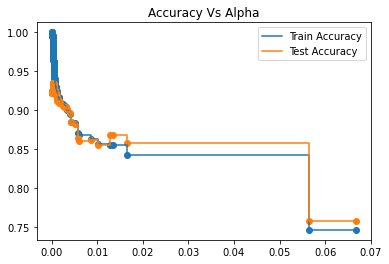

In [38]:
train_data = []
test_data = []
for c in classifiers:
    y_train_predict = c.predict(X_train)
    y_test_predict = c.predict(X_test)
    train_data.append(accuracy_score(y_train_predict,y_train))
    test_data.append(accuracy_score(y_test_predict,y_test))

plt.scatter(ccp_alphas, train_data)
plt.scatter(ccp_alphas, test_data)
plt.plot(ccp_alphas, train_data, label= 'Train Accuracy', drawstyle = 'steps-post')
plt.plot(ccp_alphas, test_data, label= 'Test Accuracy', drawstyle = 'steps-post')
plt.legend()
plt.title('Accuracy Vs Alpha')
plt.show()

We will choose 0.002 as ccp_alpha as we get the maximum accuracy here. The Train accuracy is also good.

In [39]:
classifier_postpruning = DecisionTreeClassifier(criterion='entropy', ccp_alpha = 0.002)
classifier_postpruning.fit(X_train, y_train)
y_train_predict_postpruning = classifier_postpruning.predict(X_train)
y_test_predict_postpruning = classifier_postpruning.predict(X_test)

from sklearn.metrics import accuracy_score
print(f'Training accuracy score - Decision Tree - Post Pruning :{accuracy_score(y_train_predict_postpruning, y_train)}')
print(f'Test accuracy score - Decision Tree - Post Pruning :{accuracy_score(y_test_predict_postpruning, y_test)}')

Training accuracy score - Decision Tree - Post Pruning :0.927429876060013
Test accuracy score - Decision Tree - Post Pruning :0.9334094368340944


The accuracy score for default scenario is checked

In [58]:
classifier_gini = DecisionTreeClassifier(criterion='gini',random_state=0)
classifier_gini.fit(X_train, y_train)
y_train_predict_gini = classifier_gini.predict(X_train)
y_test_predict_gini = classifier_gini.predict(X_test)

from sklearn.metrics import accuracy_score
print(f'Training accuracy score - Default Tree With GINI :{accuracy_score(y_train_predict_gini, y_train)}')
print(f'Test accuracy score - Default Tree With GINI :{accuracy_score(y_test_predict_gini, y_test)}')

Training accuracy score - Default Tree With GINI :1.0
Test accuracy score - Default Tree With GINI :0.921613394216134


# CROSS VALIDATION - DECISION TREE 

In [75]:
# Classifier - Unpruned Decision Tree
cross_validation(classifier)

Average accuracy:  0.8534246575342467
Standard Deviation:  0.08669367960060402


In [76]:
# Classifier - Decision Tree - GINI
cross_validation(classifier_gini)

Average accuracy:  0.8479452054794521
Standard Deviation:  0.10468702517866343


In [77]:
# Classifier - Decision Tree - Entropy
cross_validation(classifier_entropy)

Average accuracy:  0.8739726027397261
Standard Deviation:  0.08131380385236732


In [79]:
# Classifier - Decision Tree - Post Pruned
cross_validation(classifier_postpruning)

Average accuracy:  0.8667808219178081
Standard Deviation:  0.09965308823842159


CROSS VALIDATION USING GridSearchCV

1. Unpruned Tree

In [41]:
# Unpruned Tree
# GridSearch + CV
from sklearn.model_selection import GridSearchCV

# estimator
opt_tree = DecisionTreeClassifier(random_state = 0) 
##  random state is set for all models (hyperparameter specifications)

# hyperparameter setting
dt_params = {'max_depth':  range(1,10) ,
             'min_samples_split':   range(2,11),
             'max_leaf_nodes':    range(2,11)   }


# gridsearch function
grid_tree = GridSearchCV(opt_tree, dt_params)

grid_tree.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(1, 10),
                         'max_leaf_nodes': range(2, 11),
                         'min_samples_split': range(2, 11)})

In [42]:
# Report the best hyperparameters chosen
grid_tree.best_params_

{'max_depth': 6, 'max_leaf_nodes': 10, 'min_samples_split': 2}

In [43]:
grid_tree.best_score_

0.8711646996414284

2. Entropy

In [45]:
# ENTROPY
# GridSearch + CV
from sklearn.model_selection import GridSearchCV

# estimator
opt_tree = DecisionTreeClassifier(random_state = 0, criterion = 'entropy') 
##  random state is set for all models (hyperparameter specifications)

# hyperparameter setting
dt_params = {'max_depth':  range(1,10) ,
             'min_samples_split':   range(2,11),
             'max_leaf_nodes':    range(2,11)   }


# gridsearch function
grid_tree = GridSearchCV(opt_tree, dt_params)

grid_tree.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=0),
             param_grid={'max_depth': range(1, 10),
                         'max_leaf_nodes': range(2, 11),
                         'min_samples_split': range(2, 11)})

In [46]:
# Report the best hyperparameters chosen
grid_tree.best_params_

{'max_depth': 7, 'max_leaf_nodes': 10, 'min_samples_split': 2}

In [47]:
grid_tree.best_score_

0.8708429557362816

3. GINI

In [48]:
# ENTROPY
# GridSearch + CV
from sklearn.model_selection import GridSearchCV

# estimator
opt_tree = DecisionTreeClassifier(random_state = 0, criterion = 'gini') 
##  random state is set for all models (hyperparameter specifications)

# hyperparameter setting
dt_params = {'max_depth':  range(1,10) ,
             'min_samples_split':   range(2,11),
             'max_leaf_nodes':    range(2,11)   }


# gridsearch function
grid_tree = GridSearchCV(opt_tree, dt_params)

grid_tree.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(1, 10),
                         'max_leaf_nodes': range(2, 11),
                         'min_samples_split': range(2, 11)})

In [49]:
# Report the best hyperparameters chosen
grid_tree.best_params_

{'max_depth': 6, 'max_leaf_nodes': 10, 'min_samples_split': 2}

In [50]:
grid_tree.best_score_

0.8711646996414284

4.POST PRUNING

In [51]:
# POST PRUNING
# GridSearch + CV
from sklearn.model_selection import GridSearchCV

# estimator
opt_tree = DecisionTreeClassifier(criterion='entropy', ccp_alpha = 0.002) 
##  random state is set for all models (hyperparameter specifications)

# hyperparameter setting
dt_params = {'max_depth':  range(1,10) ,
             'min_samples_split':   range(2,11),
             'max_leaf_nodes':    range(2,11)   }


# gridsearch function
grid_tree = GridSearchCV(opt_tree, dt_params)

grid_tree.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(ccp_alpha=0.002,
                                              criterion='entropy'),
             param_grid={'max_depth': range(1, 10),
                         'max_leaf_nodes': range(2, 11),
                         'min_samples_split': range(2, 11)})

In [52]:
# Report the best hyperparameters chosen
grid_tree.best_params_

{'max_depth': 7, 'max_leaf_nodes': 10, 'min_samples_split': 2}

In [91]:
grid_tree.best_score_

0.8708429557362816

In [100]:
# Post Pruning Tree
from sklearn import tree
# grid_tree.best_estimator_
print(tree.export_text(grid_tree.best_estimator_))

|--- feature_1 <= -0.38
|   |--- feature_15 <= 0.59
|   |   |--- class: 0.0
|   |--- feature_15 >  0.59
|   |   |--- class: 0.0
|--- feature_1 >  -0.38
|   |--- feature_0 <= 0.44
|   |   |--- feature_0 <= -0.72
|   |   |   |--- class: 0.0
|   |   |--- feature_0 >  -0.72
|   |   |   |--- feature_1 <= 1.46
|   |   |   |   |--- feature_7 <= -0.08
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_7 >  -0.08
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- feature_1 >  1.46
|   |   |   |   |--- class: 0.0
|   |--- feature_0 >  0.44
|   |   |--- feature_2 <= 1.30
|   |   |   |--- feature_19 <= -2.65
|   |   |   |   |--- class: 0.0
|   |   |   |--- feature_19 >  -2.65
|   |   |   |   |--- feature_1 <= 0.12
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_1 >  0.12
|   |   |   |   |   |--- class: 1.0
|   |   |--- feature_2 >  1.30
|   |   |   |--- class: 0.0



In [111]:
X_train.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Day,Weekday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,0.075614,0.938038,1.080926,-0.886448,0.919502,1.254397,0.167554,-0.125899,-0.173321,1.003934,-0.983276,1.573592,-0.578857,-0.581116,1.728293,-0.570822,-0.22521,0.22521,-0.182666,0.182666
1,0.220193,2.089728,-0.983977,0.552278,0.702462,1.307901,2.833708,-0.125899,-0.173321,-1.607790,-0.869596,-0.635489,-0.578857,-0.581116,1.728293,-0.570822,-0.22521,0.22521,-0.182666,0.182666
2,-0.213544,0.387230,-1.131470,0.072703,0.212476,-0.167266,1.929733,-0.125899,-0.173321,-0.737215,1.517673,1.573592,-0.578857,1.720825,-0.578606,-0.570822,-0.22521,0.22521,-0.182666,0.182666
3,-0.791860,-0.931372,-0.000690,1.991005,-0.413983,-0.732874,-0.656322,-0.125899,-0.173321,0.133359,-1.324314,-0.635489,-0.578857,1.720825,-0.578606,-0.570822,-0.22521,0.22521,-0.182666,0.182666
4,0.220193,1.188405,-0.983977,-0.023212,0.919502,0.574139,2.273015,-0.125899,-0.173321,1.003934,-0.755917,-0.635489,1.727543,-0.581116,-0.578606,-0.570822,-0.22521,0.22521,-0.182666,0.182666


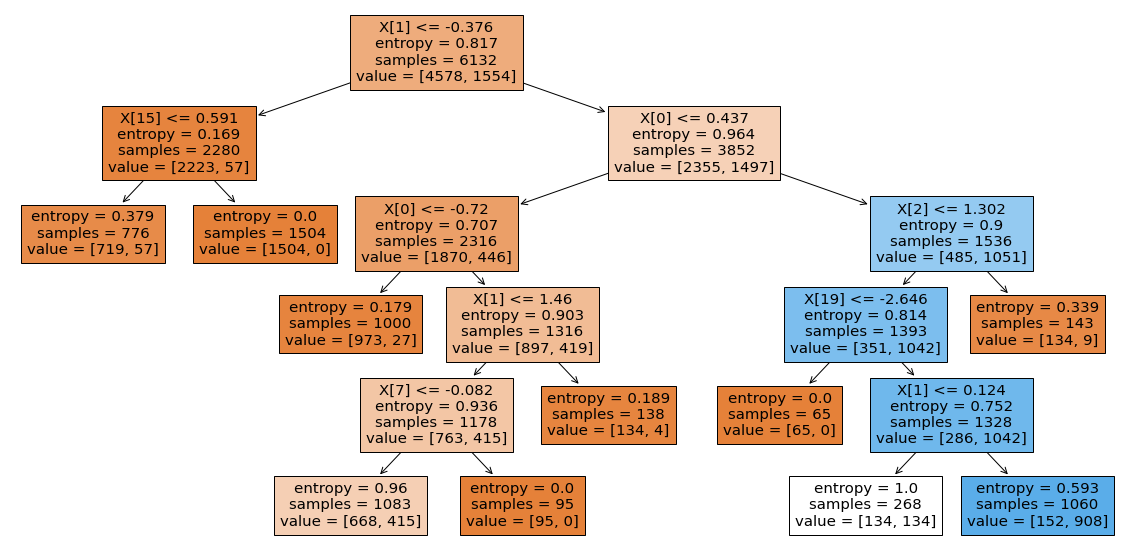

In [85]:
# Plot the decision tree
from sklearn import tree

fig = plt.figure(figsize=(20,10)) # set a proper figure size (in case that the figure is too small to read or ratio is not proper)

tree.plot_tree(grid_tree.best_estimator_, 
               filled = True, impurity = True) # whether to color the boxes, whether to report gini index
             #   fontsize = 12) # set fontsize to read
plt.show()


# CLASSIFICATION METRICS 

We will check the classification report for the classifier which performed the best

1. Decision Tree - GINI
2. Decision Tree - Entropy
3. Decision Tree - Post Pruning
4. SVM - DEFAULT parameters (0.9243)
5. SVM - POLYNOMIAL and C= 100.0 (0.9212)


In [45]:
#After running Decision Tree - Unpruned
def classification_details (y_test,y_test_predicted):
    confmatrix = confusion_matrix(y_test, y_test_predicted)
    print('Confusion matrix\n\n', confmatrix)
    print('\nTrue Positives(TP) = ', confmatrix[0,0])
    print('\nTrue Negatives(TN) = ', confmatrix[1,1])
    print('\nFalse Positives(FP) = ', confmatrix[0,1])
    print('\nFalse Negatives(FN) = ', confmatrix[1,0])

    from sklearn.metrics import classification_report
    print(classification_report(y_test, y_test_predicted))

    #Classification Accuracy
    TP = confmatrix[0,0]
    TN = confmatrix[1,1]
    FP = confmatrix[0,1]
    FN = confmatrix[1,0]

    classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
    print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

    # print classification error
    classification_error = (FP + FN) / float(TP + TN + FP + FN)
    print('Classification error : {0:0.4f}'.format(classification_error))

    # print precision score
    precision = TP / float(TP + FP)
    print('Precision : {0:0.4f}'.format(precision))

    recall = TP / float(TP + FN)
    print('Recall or Sensitivity : {0:0.4f}'.format(recall))

    true_positive_rate = TP / float(TP + FN)
    print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

    false_positive_rate = FP / float(FP + TN)
    print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

    specificity = TN / (TN + FP)
    print('Specificity : {0:0.4f}'.format(specificity))
    
    # plot ROC Curve
    from sklearn.metrics import roc_curve
    fpr, tpr, thresholds = roc_curve(y_test, y_test_predicted)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0,1], [0,1], 'k--' )
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.show()
    
    # compute ROC AUC
    from sklearn.metrics import roc_auc_score
    ROC_AUC = roc_auc_score(y_test, y_test_predicted)
    print('ROC AUC : {:.4f}'.format(ROC_AUC))

Confusion matrix

 [[1847  145]
 [  81  555]]

True Positives(TP) =  1847

True Negatives(TN) =  555

False Positives(FP) =  145

False Negatives(FN) =  81
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94      1992
         1.0       0.79      0.87      0.83       636

    accuracy                           0.91      2628
   macro avg       0.88      0.90      0.89      2628
weighted avg       0.92      0.91      0.92      2628

Classification accuracy : 0.9140
Classification error : 0.0860
Precision : 0.9272
Recall or Sensitivity : 0.9580
True Positive Rate : 0.9580
False Positive Rate : 0.2071
Specificity : 0.7929


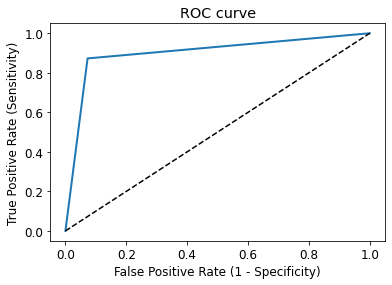

ROC AUC : 0.8999


In [50]:
#1 Decision Tree - GINI
classification_details(y_test, y_test_predict_gini)

Confusion matrix

 [[1902   90]
 [ 202  434]]

True Positives(TP) =  1902

True Negatives(TN) =  434

False Positives(FP) =  90

False Negatives(FN) =  202
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.93      1992
         1.0       0.83      0.68      0.75       636

    accuracy                           0.89      2628
   macro avg       0.87      0.82      0.84      2628
weighted avg       0.89      0.89      0.89      2628

Classification accuracy : 0.8889
Classification error : 0.1111
Precision : 0.9548
Recall or Sensitivity : 0.9040
True Positive Rate : 0.9040
False Positive Rate : 0.1718
Specificity : 0.8282


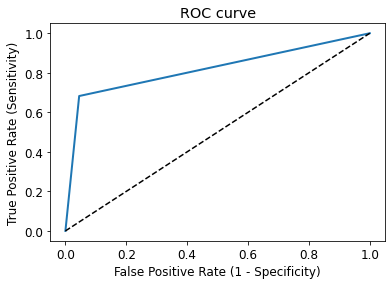

ROC AUC : 0.8186


In [49]:
#2 Decision Tree - Entropy
classification_details(y_test, y_test_predict_entropy)

Confusion matrix

 [[1892  100]
 [  75  561]]

True Positives(TP) =  1892

True Negatives(TN) =  561

False Positives(FP) =  100

False Negatives(FN) =  75
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96      1992
         1.0       0.85      0.88      0.87       636

    accuracy                           0.93      2628
   macro avg       0.91      0.92      0.91      2628
weighted avg       0.93      0.93      0.93      2628

Classification accuracy : 0.9334
Classification error : 0.0666
Precision : 0.9498
Recall or Sensitivity : 0.9619
True Positive Rate : 0.9619
False Positive Rate : 0.1513
Specificity : 0.8487


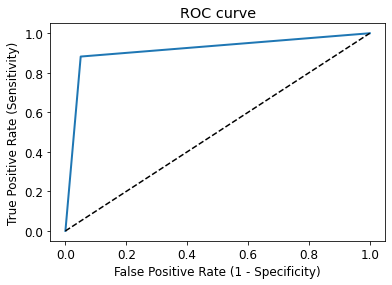

ROC AUC : 0.9159


In [85]:
#3 Decision Tree - Post Pruned
classification_details(y_test, y_test_predict_postpruning)

Confusion matrix

 [[1904   88]
 [ 111  525]]

True Positives(TP) =  1904

True Negatives(TN) =  525

False Positives(FP) =  88

False Negatives(FN) =  111
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      1992
         1.0       0.86      0.83      0.84       636

    accuracy                           0.92      2628
   macro avg       0.90      0.89      0.90      2628
weighted avg       0.92      0.92      0.92      2628

Classification accuracy : 0.9243
Classification error : 0.0757
Precision : 0.9558
Recall or Sensitivity : 0.9449
True Positive Rate : 0.9449
False Positive Rate : 0.1436
Specificity : 0.8564


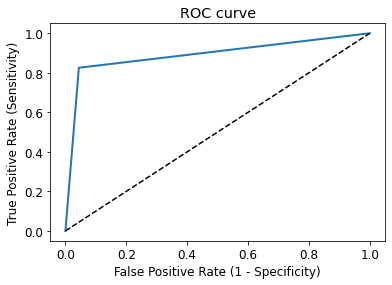

ROC AUC : 0.8906


In [48]:
#4 SVM - Default at C = 100.0
classification_details(y_test, y_pred)

Confusion matrix

 [[1907   85]
 [ 122  514]]

True Positives(TP) =  1907

True Negatives(TN) =  514

False Positives(FP) =  85

False Negatives(FN) =  122
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      1992
         1.0       0.86      0.81      0.83       636

    accuracy                           0.92      2628
   macro avg       0.90      0.88      0.89      2628
weighted avg       0.92      0.92      0.92      2628

Classification accuracy : 0.9212
Classification error : 0.0788
Precision : 0.9573
Recall or Sensitivity : 0.9399
True Positive Rate : 0.9399
False Positive Rate : 0.1419
Specificity : 0.8581


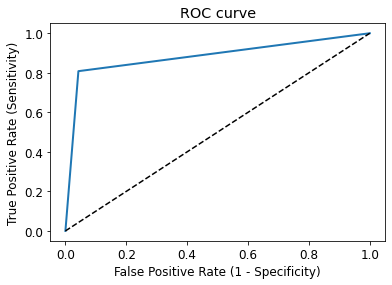

ROC AUC : 0.8828


In [51]:
#4 SVM - Default at Poly, C = 100.0
classification_details(y_test, y_pred_poly)